# Version 2.5.1 – Centralized Plotting & Diagnostics

In this notebook, we demonstrate the use of centralized plotting and diagnostic utilities.

- Diagnostics are now reusable from `utils/diagnostics.py`  
- Visualizations are cleanly modular via `visualisation/plotting_2d.py`  
- This prepares the simulation tool for GUI, CLI, and clean research outputs.

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

# Set project path
sys.path.append(os.path.abspath("../src"))

from numerics.laplacian_2d import make_laplacian_2d
from core.pde_systems import LinearPDESystem2D
from utils.diagnostics import plot_mass_evolution, plot_l2_error
from visualization.plotting_2d import plot_final_frame, plot_initial_vs_final

In [2]:
N = 64
L = 10.0
dx = dy = L / N
x = np.linspace(-L/2, L/2, N, endpoint=False)
y = x.copy()
X, Y = np.meshgrid(x, y, indexing="ij")

# Gaussian initial condition
u0 = np.exp(-(X**2 + Y**2) / 2)

In [3]:
L_op = make_laplacian_2d(N, N, dx, dy)
system = LinearPDESystem2D(L_op, alpha=1.0)
u_history = system.evolve(u0, dt=0.005, steps=300)

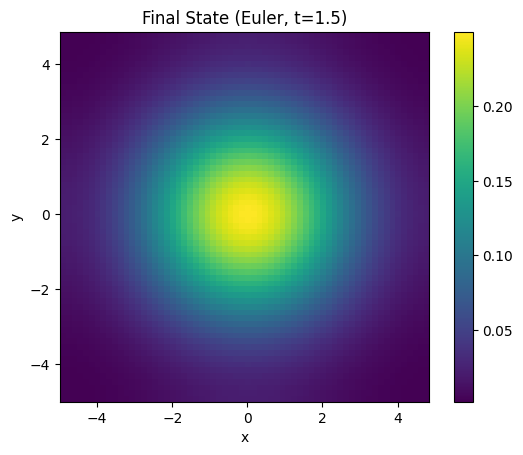

In [4]:
plot_final_frame(u_history[-1], x, y, title="Final State (Euler, t=1.5)")

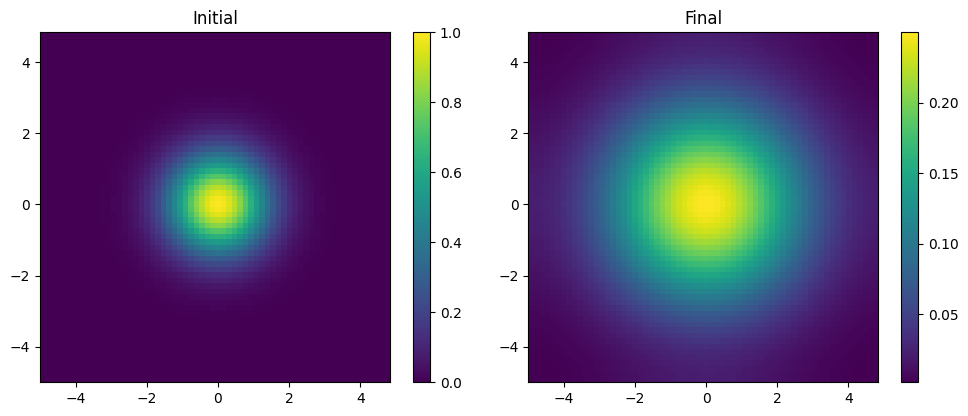

In [5]:
plot_initial_vs_final(u0, u_history[-1], x, y)

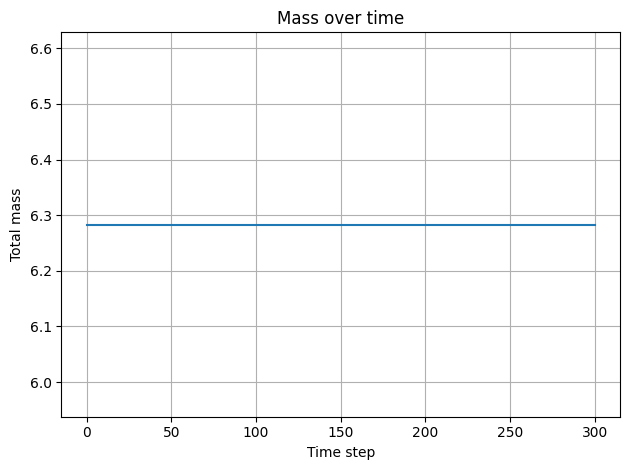

In [6]:
plot_mass_evolution(u_history, dx, dy)

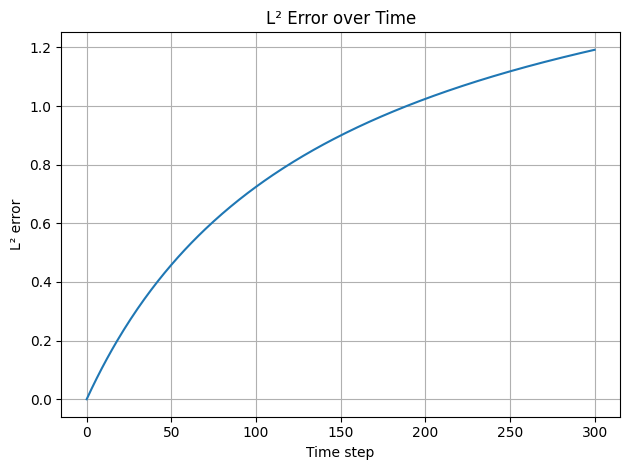

In [7]:
plot_l2_error(u_history, reference=u0, dx=dx, dy=dy)

---
##  Summary: Why We Modularized Plotting & Diagnostics

This version (v2.5.1) introduces **centralized visual and diagnostic utilities** to streamline simulation workflows.

###  Why We Did This
- Previously, all plots and diagnostics (mass, L² error, frames) were scattered across notebooks.
- Repetition led to inconsistency and made GUI/CLI development harder.

###  What We Gained
- Cleaner notebooks — just one-line function calls instead of bulky `matplotlib` code.
- Reusability — all plot logic lives in `src/visualisation/` and `src/utils/`.
- Scientific readiness — reproducible, standardized plots for papers or demos.
- UI/CLI integration — future buttons (e.g. “Show L² error”) just call these functions.
- Ease of testing — same plots can be reused across versions and PDE systems.

> This change is foundational for scaling to 3D, ML-enhanced PDEs, and GUI-ready scientific tooling.
---